<a href="https://colab.research.google.com/github/leenago/Self_studying/blob/master/Statistics/statistics_5%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.준비하기

## 1) 한글 폰트 설치하기

In [ ]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

## 2) Google Drive와 연동하기

In [ ]:
from google.colab import drive # 패키지 불러오기 
from os.path import join  

ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 Mount

MY_GOOGLE_DRIVE_PATH = 'My Drive/파비통 데이터' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive
Mounted at /content/drive
/content/drive/My Drive/파비통 데이터


In [ ]:
%cd /content/drive/My Drive/파비통 데이터

/content/drive/My Drive/파비통 데이터


In [ ]:
%ls

'실습파일_10장 분산분석.ipynb'
'실습파일_11장 회귀분석.ipynb'
'실습파일_12장 요인분석.ipynb'
'실습파일_13장 분류예측분석.ipynb'
'실습파일_14장 군집분석.ipynb'
'실습파일_15장 포지셔닝 분석.ipynb'
'실습파일_16장 컨조인트 분석.ipynb'
'실습파일_17장 비모수 통계분석.ipynb'
'실습파일_3장 파이썬 기초.ipynb'
'실습파일_4장 데이터전처리 및 기초분석.ipynb'
'실습파일_5장 기술통계분석.ipynb'
'실습파일_6장 t 검정.ipynb'
'실습파일_7장 상관관계분석.ipynb'
'실습파일_8장 범주형 데이터 분석.ipynb'
'실습파일_9장 신뢰성 분석.ipynb'
 Ashopping.csv
 CCA.csv
 Conjoint.csv
 Correspondence.csv
 부록_통계표.docx
 MDS1.csv
 MDS3.csv
'Step by Step 파이썬 비즈니스 통계분석_정오표.xlsx'


In [ ]:
#데이터 불러오기
df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,6,6,1,3,1051,1,6,6,7,2,4,4,2,2,6,6,5,6.0,6.0,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,6,6,0,6,1038,0,3,4,7,5,6,5,5,7,6,6,7,6.0,6.0,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,4,4,0,2,1092,1,4,5,7,3,2,3,5,5,7,6,7,6.0,NaN,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,5,5,1,6,1069,0,5,6,7,3,6,4,6,5,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4


#2.본문

## 1) 평균, 분산, 표준편차


### (1)평균: 자료들의 중심 성향 특징을 나타내는 대표 값, 사용목적에 따라 **산술평균**, **기하평균**, **조화평균** 으로 나눌 수 있다.



- **산술평균**: 보통 우리가 알고 있는 평균

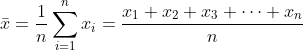


---



- **기하평균**: 자료들의 곱을 자료 수만큼 제곱근, 곱셈으로 계산하는 값들의 평균을 계산하고자 할 때 사용

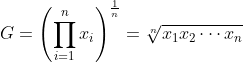



>ex) 당신이 투자를 했는데, 첫 해는 *10%*를 벌었고, 둘째 해에는 *50%*, 셋째 해에는 *30%*를 벌었다. 그 경우 *3년간 당신의 평균 수익률*은 얼마인가?

> 예시:  기하평균계산 예시.jpg



---





 




- **조화평균**: n개의 양수에 대해 그 역수들을 산술평균하고, 이를 다시 역수로 취한 값 / 데이터의 평균적인 변화율이나 업무능률의 평균을 구할 때 사용

  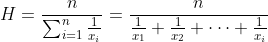

>ex) 당신이 경기도 이천에서 차를 몰고 서울 강남을 다녀왔다. 갈 때는 고속도로가 막혀서 평균 속도 70km/h로 갔고 올 때는 막힘이 없어 평균속도 100km/h로 돌아왔다. 그렇다면 당신은 서울을 평균속도 얼마로 다녀왔는가?

> 풀이: 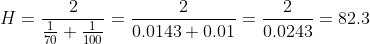


### (2) 분산과 표준편차 - 자료의 퍼짐 정도

- 분산: 편차를 제곱한 값의 평균

#### 교재 예시
- A쇼핑몰은 고객에게 쿠폰으로 증정한 할인권의, 사용 횟수에 대해 평균, 분산, 표준편차를 성별에 따라 알아보고자 함.
- 성별에 따른 분포가 다르다면 성별에 따른 차별화된 할인쿠폰 제공 전략을 시행하고자 함.

In [ ]:
df_1=df[['할인권_사용 횟수','성별']]
df_1.head()

,할인권_사용 횟수,성별
0,1,1
1,22,1
2,6,1
3,1,1
4,9,0


In [ ]:
#성별 평균, 분산, 표준편차 구하기
print('*평균')
print(df_1.groupby('성별').mean())
print('\n')
print('*분산')
print(df_1.groupby('성별').var())
print('\n')
print('*표준편차')
print(df_1.groupby('성별').std())

*평균
    할인권_사용 횟수
성별           
0   15.986577
1   16.034078


*분산
    할인권_사용 횟수
성별           
0   69.053873
1   69.750602


*표준편차
    할인권_사용 횟수
성별           
0    8.309866
1    8.351683


- 할인권 사용 횟수는 약 16회, 표준편차가 약 8.3회이다.
- 남자(0)와 여자(1)의 패턴이 크게 차이가 나지 않는 것으로 보아, 성별에 따른 개별 마케팅은 필요하지 않다고 생각할 수 있다.

## 2) 왜도와 첨도
- 산포도의 치우침과 뾰족함을 나타냄으로써, 산포도의 외형적인 특징을 설명하는데 도움을 준다.
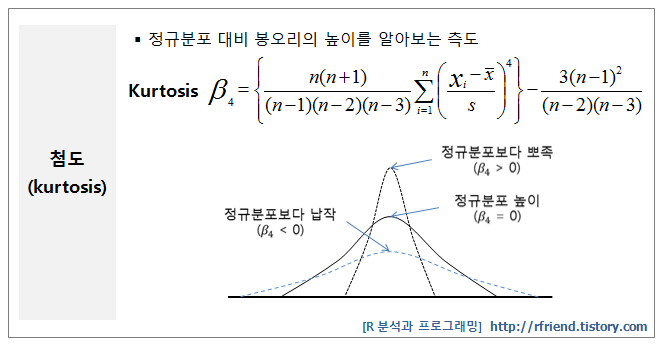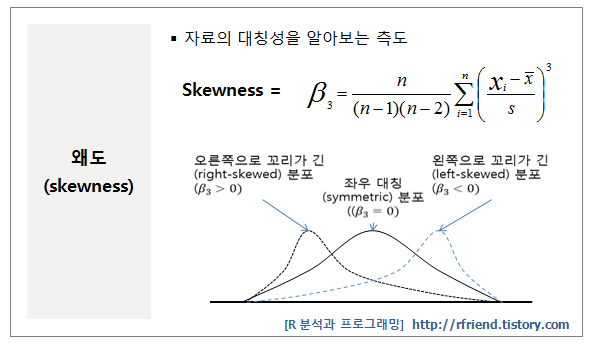


#### 교재 예시
- A쇼핑몰의 서비스만족도에 대한 왜도와 첨도 알아보기

In [ ]:
print('*왜도')
print(df.서비스_만족도.skew())
print('\n')
print('첨도')
print(df.서비스_만족도.kurt())
print('\n')
print('*평균')
print(df.서비스_만족도.mean())

*왜도
-0.9706614720587393


첨도
1.1478245800949547


*평균
5.544


Text(0, 0.5, '고객 수')

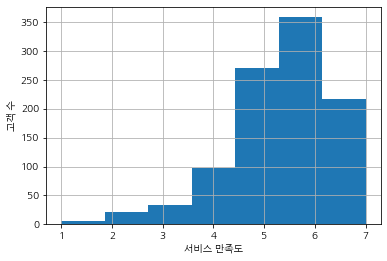

In [ ]:
#왜도와 첨도 히스토그램 그리기
%matplotlib inline
df.서비스_만족도.hist(bins=7)
plt.xlabel('서비스 만족도')
plt.ylabel('고객 수')

- 왜도 값이 음수이기 때문에, 왼쪽 꼬리 비대칭 분포의 모양이 나왔다.
- 평균값(약 5.5)에 비해 높은 점수를 준 고객이 많음을 볼 수 있다.

## 3)기타 기술통계량 - 중앙값, 최빈값, 사분위수


- 중앙값: 자료들을 크기 순서대로 늘어놓았을 때 가장 중앙에 위치한 값
- 최빈값: 자료의 집단에서 가장 많이 관측되는 수치

- 사분위수: 자료의 크기를 순서로 늘어놓았을 때, 누적 백분율을 4등분한 각 점에 위치한 값

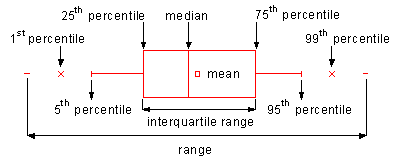


#### 교재 예시
- A쇼핑몰은 고객들에게 정기적으로 할인쿠폰을 발송하고 있다. 고객들의 평균 할인쿠폰 사용량이 연간 약 16회 정도이므로 현재 발송횟수가 적절하다고 생각해왔다. 하지만 사용빈도의 평균만으로는 의사결정의 신뢰성이 떨어지기 때문에, 중앙값, 최빈값 등의 통계량으로 의사결정의 타당성을 알아보고자 함.

In [ ]:
#사분위수 구하기
print(np.percentile(df['할인권_사용 횟수'],25))
print(np.percentile(df['할인권_사용 횟수'],50))
print(np.percentile(df['할인권_사용 횟수'],75))
print(np.percentile(df['할인권_사용 횟수'],100))

9.0
17.0
23.0
30.0


In [ ]:
#최빈값 구하기
df['할인권_사용 횟수'].value_counts().idxmax()

22

In [ ]:
#기술통계량 출력
df['할인권_사용 횟수'].describe()

count    1000.000000
mean       16.027000
std         8.341334
min         1.000000
25%         9.000000
50%        17.000000
75%        23.000000
max        30.000000
Name: 할인권_사용 횟수, dtype: float64

Text(0, 0.5, '고객 수')

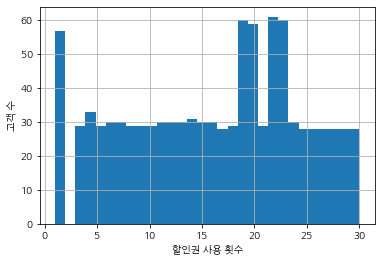

In [ ]:
%matplotlib inline
df['할인권_사용 횟수'].hist(bins=30)
plt.xlabel('할인권 사용 횟수')
plt.ylabel('고객 수')

In [ ]:
df['할인권_사용 횟수'].value_counts().sum()

1000

- 고객들의 평균 할인쿠폰 사용량은 약 16회이다.
- 중간 수준으로 할인쿠폰을 사용하는 고객은 연간 17회를 사용하며, 연간 22회를 사용하는 고객이 가장 많았다.
- 상위고객으로 갈수록 연간 할인권 사용 횟수는 많이 높아진다.

- [reference1 - 산술,기하,조화평균](http://piramvill2.org/wp/?p=1711)
- [reference2 - 왜도,첨도](https://rfriend.tistory.com/123)
- [reference3 - 기타기술통계량](http://www.ssacstat.com/base/cs/cs_05.php?com_board_basic=read_form&com_board_idx=151&topmenu=5&left=5&&com_board_search_code=&com_board_search_value1=&com_board_search_value2=&com_board_page=3&)